In [1]:
# Import the required libraries
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statistics import mode

In [2]:
# Connect to the database
conn = sqlite3.connect('data.db')
cursor = conn.cursor()

# Query and joining all the tables in the database and obtain the data as a DataFrame
query = """
SELECT c.client_id, c.age, c.job, c.marital, c.education, c.gender,
       cp.has_deposits, cp.loan, cp.has_insurance, cp.has_mortgage,
       ice.poutcome,
       b.date, b.balance, b.currency
FROM client AS c
LEFT JOIN client_products  AS cp ON c.client_id = cp.client_id
LEFT JOIN inv_campaign_eval  AS ice ON c.client_id = ice.client_id
LEFT JOIN balances AS b ON c.client_id = b.client_id
"""
df = pd.read_sql_query(query, conn)
df

,client_id,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,poutcome,date,balance,currency
0,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-06-21 16:21:15.291346,2633.671253,CZK
1,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-07-05 16:21:15.291346,2663.697443,CZK
2,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-07-19 16:21:15.291346,2605.350108,CZK
3,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-08-02 16:21:15.291346,2694.840314,CZK
4,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-08-16 16:21:15.291346,2656.018182,CZK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290207,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-04-11 16:22:46.440217,84.358039,CZK
290208,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-04-25 16:22:46.440217,8.617271,CZK
290209,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-05-09 16:22:46.440217,40.666162,CZK
290210,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-05-23 16:22:46.440217,-13.947329,CZK


In [3]:
#Change the data types of the age and balance columns

def change_data_types(df):
    df['date'] = pd.to_datetime(df['date'])
    df['age'] = df['age'].astype(float)
    df['balance'] = df['balance'].astype(float)

    return df

df = change_data_types(df)
df

,client_id,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,poutcome,date,balance,currency
0,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-06-21 16:21:15.291346,2633.671253,CZK
1,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-07-05 16:21:15.291346,2663.697443,CZK
2,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-07-19 16:21:15.291346,2605.350108,CZK
3,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-08-02 16:21:15.291346,2694.840314,CZK
4,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-08-16 16:21:15.291346,2656.018182,CZK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290207,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-04-11 16:22:46.440217,84.358039,CZK
290208,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-04-25 16:22:46.440217,8.617271,CZK
290209,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-05-09 16:22:46.440217,40.666162,CZK
290210,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-05-23 16:22:46.440217,-13.947329,CZK


In [4]:
#CONVERTING THE BALANCE TO CZK
def convert_to_czk(row, currency):
    if currency == 'USD':
        return row['balance'] * usd_to_czk
    elif currency == 'EURO':
        return row['balance'] * euro_to_czk
    else:
        return row['balance']

usd_to_czk = 23.4  # replace with the current exchange rate
euro_to_czk = 25.32  # replace with the current exchange rate

df['balance'] = df.apply(lambda row: convert_to_czk(row, row['currency']), axis=1)
df

,client_id,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,poutcome,date,balance,currency
0,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-06-21 16:21:15.291346,2633.671253,CZK
1,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-07-05 16:21:15.291346,2663.697443,CZK
2,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-07-19 16:21:15.291346,2605.350108,CZK
3,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-08-02 16:21:15.291346,2694.840314,CZK
4,249789938,38.0,services,married,secondary,M,yes,no,n,no,success,2022-08-16 16:21:15.291346,2656.018182,CZK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290207,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-04-11 16:22:46.440217,84.358039,CZK
290208,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-04-25 16:22:46.440217,8.617271,CZK
290209,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-05-09 16:22:46.440217,40.666162,CZK
290210,705801685,36.0,blue-collar,single,secondary,F,yes,no,n,yes,success,2023-05-23 16:22:46.440217,-13.947329,CZK


In [5]:
# Calculate the average spending for each client
def calculate_average_spending(df):
    # Sort the DataFrame
    df = df.sort_values(['client_id', 'date'])

    # Calculate the balance difference for each date
    df['balance_diff'] = df.groupby('client_id')['balance'].diff()

    # Calculate the average spending for each client
    average_spending = df.groupby('client_id')['balance_diff'].mean()

    # Map the average spending to the client_id in the original DataFrame
    df['average_spending'] = df['client_id'].map(average_spending)

    return df

df_spending = calculate_average_spending(df)
df_spending

,client_id,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,poutcome,date,balance,currency,balance_diff,average_spending
265876,100070076,41.0,management,divorced,tertiary,M,no,no,n,no,None,2022-06-21 16:22:36.643827,361.807400,CZK,NaN,-7.454485
265877,100070076,41.0,management,divorced,tertiary,M,no,no,n,no,None,2022-07-05 16:22:36.643827,113.142183,CZK,-248.665217,-7.454485
265878,100070076,41.0,management,divorced,tertiary,M,no,no,n,no,None,2022-07-19 16:22:36.643827,148.537614,CZK,35.395431,-7.454485
265879,100070076,41.0,management,divorced,tertiary,M,no,no,n,no,None,2022-08-02 16:22:36.643827,215.003236,CZK,66.465622,-7.454485
265880,100070076,41.0,management,divorced,tertiary,M,no,no,n,no,None,2022-08-16 16:22:36.643827,129.477982,CZK,-85.525254,-7.454485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232695,1999956516,32.0,blue-collar,married,secondary,M,yes,no,n,yes,failure,2023-04-11 16:22:24.006798,207.392088,CZK,-99.430220,2.536917
232696,1999956516,32.0,blue-collar,married,secondary,M,yes,no,n,yes,failure,2023-04-25 16:22:24.006798,257.053986,CZK,49.661898,2.536917
232697,1999956516,32.0,blue-collar,married,secondary,M,yes,no,n,yes,failure,2023-05-09 16:22:24.006798,271.478324,CZK,14.424338,2.536917
232698,1999956516,32.0,blue-collar,married,secondary,M,yes,no,n,yes,failure,2023-05-23 16:22:24.006798,180.129715,CZK,-91.348609,2.536917


In [6]:
# Select the latest balance for each client
def select_latest_balance(df_spending):
    # Sort by 'client_id' and 'date'
    df_spending = df_spending.sort_values(['client_id', 'date'])
    
    # Calculate the average balance for each client
    average_balance = df_spending.groupby('client_id')['balance'].mean()

    # Map the average balance to the client_id in the original DataFrame
    df_spending['average_balance'] = df_spending['client_id'].map(average_balance)
    
    # Drop duplicates, keeping only the last entry for each 'client_id'
    df_spending = df_spending.drop_duplicates('client_id', keep='last')
    
    return df_spending

df_balance = select_latest_balance(df_spending)
df_balance

,client_id,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,poutcome,date,balance,currency,balance_diff,average_spending,average_balance
265901,100070076,41.0,management,divorced,tertiary,M,no,no,n,no,None,2023-06-06 16:22:36.643827,175.445269,CZK,29.953812,-7.454485,203.907928
175317,100141910,34.0,management,single,tertiary,F,no,no,n,yes,None,2023-06-06 16:22:04.265177,2559.041192,CZK,9.340310,0.444639,2544.965438
191645,100207570,34.0,management,single,tertiary,F,yes,no,n,no,None,2023-06-06 16:22:09.249972,94.055761,CZK,107.718168,2.436701,-15.679495
43705,100488560,43.0,admin.,single,secondary,F,yes,no,n,no,failure,2023-06-06 16:21:25.597087,382.755389,CZK,6.380241,5.109879,381.488613
262703,100605013,21.0,student,single,primary,M,yes,no,y,no,success,2023-06-06 16:22:35.410449,369.476219,CZK,-140.446928,0.039401,420.351449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22879,1999463182,34.0,blue-collar,married,secondary,M,no,no,n,yes,None,2023-06-06 16:21:20.742835,1146.101785,CZK,-165.302083,-4.687871,1268.089349
130363,1999499145,31.0,management,single,tertiary,F,no,no,n,yes,None,2023-06-06 16:21:50.781726,30.830676,CZK,36.034384,-0.482484,-4.751058
87099,1999715381,24.0,blue-collar,married,secondary,M,yes,no,n,yes,None,2023-06-06 16:21:36.964752,792.767525,CZK,136.046944,6.663159,676.988885
89179,1999945413,39.0,None,single,tertiary,F,yes,no,n,no,None,2023-06-06 16:21:37.470159,5077.753230,CZK,3.199596,-3.010250,5047.496305


In [7]:
#fill the missing values in the 'job', 'marital', and 'education' columns with the mode
df_balance['job'] = df_balance['job'].fillna(mode(df_balance['job']))
df_balance['marital'] = df_balance['marital'].fillna(mode(df_balance['marital']))
df_balance['education'] = df_balance['education'].fillna(mode(df_balance['education']))
df_balance['age'] = df_balance['age'].fillna(df_balance['age'].mean())
df_balance

,client_id,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,poutcome,date,balance,currency,balance_diff,average_spending,average_balance
265901,100070076,41.0,management,divorced,tertiary,M,no,no,n,no,None,2023-06-06 16:22:36.643827,175.445269,CZK,29.953812,-7.454485,203.907928
175317,100141910,34.0,management,single,tertiary,F,no,no,n,yes,None,2023-06-06 16:22:04.265177,2559.041192,CZK,9.340310,0.444639,2544.965438
191645,100207570,34.0,management,single,tertiary,F,yes,no,n,no,None,2023-06-06 16:22:09.249972,94.055761,CZK,107.718168,2.436701,-15.679495
43705,100488560,43.0,admin.,single,secondary,F,yes,no,n,no,failure,2023-06-06 16:21:25.597087,382.755389,CZK,6.380241,5.109879,381.488613
262703,100605013,21.0,student,single,primary,M,yes,no,y,no,success,2023-06-06 16:22:35.410449,369.476219,CZK,-140.446928,0.039401,420.351449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22879,1999463182,34.0,blue-collar,married,secondary,M,no,no,n,yes,None,2023-06-06 16:21:20.742835,1146.101785,CZK,-165.302083,-4.687871,1268.089349
130363,1999499145,31.0,management,single,tertiary,F,no,no,n,yes,None,2023-06-06 16:21:50.781726,30.830676,CZK,36.034384,-0.482484,-4.751058
87099,1999715381,24.0,blue-collar,married,secondary,M,yes,no,n,yes,None,2023-06-06 16:21:36.964752,792.767525,CZK,136.046944,6.663159,676.988885
89179,1999945413,39.0,management,single,tertiary,F,yes,no,n,no,None,2023-06-06 16:21:37.470159,5077.753230,CZK,3.199596,-3.010250,5047.496305


In [8]:
#drop the date and currency columns
df_balance = df_balance.drop(columns=['date', 'currency'])

#drop the 'balance_diff' column
df_balance = df_balance.drop(columns=['balance_diff'])
df_balance

,client_id,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,poutcome,balance,average_spending,average_balance
265901,100070076,41.0,management,divorced,tertiary,M,no,no,n,no,None,175.445269,-7.454485,203.907928
175317,100141910,34.0,management,single,tertiary,F,no,no,n,yes,None,2559.041192,0.444639,2544.965438
191645,100207570,34.0,management,single,tertiary,F,yes,no,n,no,None,94.055761,2.436701,-15.679495
43705,100488560,43.0,admin.,single,secondary,F,yes,no,n,no,failure,382.755389,5.109879,381.488613
262703,100605013,21.0,student,single,primary,M,yes,no,y,no,success,369.476219,0.039401,420.351449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22879,1999463182,34.0,blue-collar,married,secondary,M,no,no,n,yes,None,1146.101785,-4.687871,1268.089349
130363,1999499145,31.0,management,single,tertiary,F,no,no,n,yes,None,30.830676,-0.482484,-4.751058
87099,1999715381,24.0,blue-collar,married,secondary,M,yes,no,n,yes,None,792.767525,6.663159,676.988885
89179,1999945413,39.0,management,single,tertiary,F,yes,no,n,no,None,5077.753230,-3.010250,5047.496305


In [9]:
#selecting the clients in the first campaign evaluation
df_outcome = df_balance[df_balance['poutcome'].isin(['failure', 'success'])]

# Showing the first campaign table
print(df_outcome)

         client_id   age          job  marital  education gender has_deposits  \
43705    100488560  43.0       admin.   single  secondary      F          yes   
262703   100605013  21.0      student   single    primary      M          yes   
103115   102604801  41.0   management  married  secondary      F           no   
286857   104030718  27.0      student   single   tertiary      F          yes   
123967   106830158  39.0   management  married    primary      F          yes   
...            ...   ...          ...      ...        ...    ...          ...   
257373  1996359586  40.0   unemployed   single   tertiary      M          yes   
94327   1996474627  48.0   unemployed  married  secondary      M          yes   
33851   1997220693  42.0       admin.  married    primary      F          yes   
187381  1997336391  30.0   management  married   tertiary      M          yes   
232699  1999956516  32.0  blue-collar  married  secondary      M          yes   

       loan has_insurance h

In [10]:
#change the 'poutcome' column to binary
df_outcome.loc[:, 'poutcome'] = df_outcome['poutcome'].map({'failure': 'no', 'success': 'yes'})
df_outcome

,client_id,age,job,marital,education,gender,has_deposits,loan,has_insurance,has_mortgage,poutcome,balance,average_spending,average_balance
43705,100488560,43.0,admin.,single,secondary,F,yes,no,n,no,no,382.755389,5.109879,381.488613
262703,100605013,21.0,student,single,primary,M,yes,no,y,no,yes,369.476219,0.039401,420.351449
103115,102604801,41.0,management,married,secondary,F,no,no,n,yes,yes,184.981881,-4.462468,270.449689
286857,104030718,27.0,student,single,tertiary,F,yes,no,n,no,yes,340.821795,1.509400,312.058814
123967,106830158,39.0,management,married,primary,F,yes,no,n,yes,yes,6981.709891,-0.950741,7008.932616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257373,1996359586,40.0,unemployed,single,tertiary,M,yes,no,n,no,yes,7957.013794,-3.877861,7956.276324
94327,1996474627,48.0,unemployed,married,secondary,M,yes,no,n,no,yes,989.012654,2.509168,919.751520
33851,1997220693,42.0,admin.,married,primary,F,yes,no,n,yes,yes,-248.224994,0.464894,-284.422803
187381,1997336391,30.0,management,married,tertiary,M,yes,no,n,yes,no,8093.323617,1.771686,8090.524175


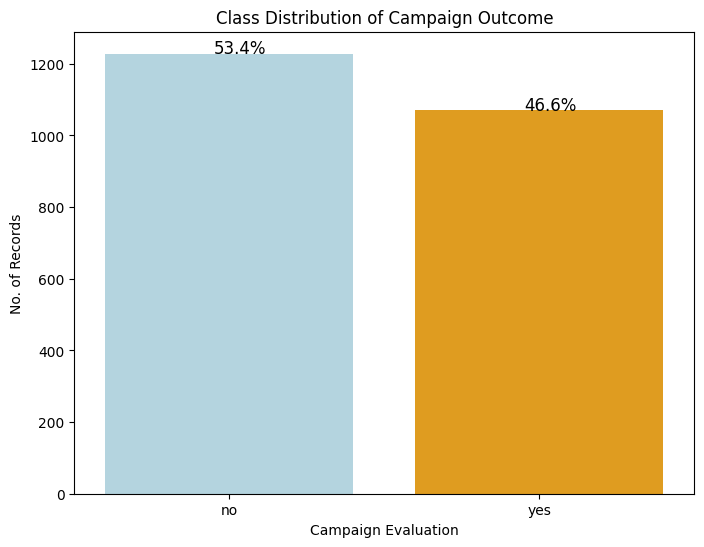

In [11]:
#plot the class distribution of the campaign outcome
plt.figure(figsize=(8, 6))
ax = sb.countplot(data=df_outcome, x='poutcome', hue='poutcome', palette={'no': 'lightblue', 'yes': 'orange'}, legend=False)
ax.set_title('Class Distribution of Campaign Outcome')
plt.xlabel('Campaign Evaluation')
plt.ylabel('No. of Records')

# Calculate percentages
total = len(df_outcome)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

plt.show()

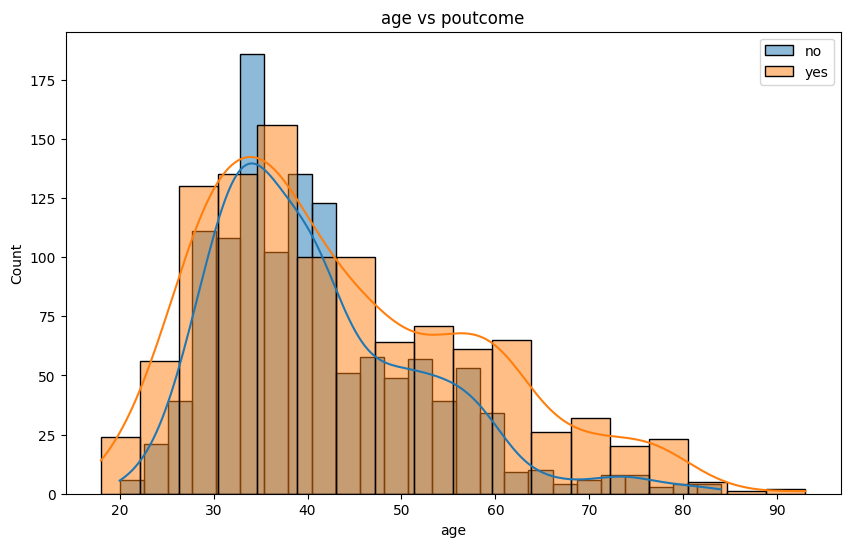

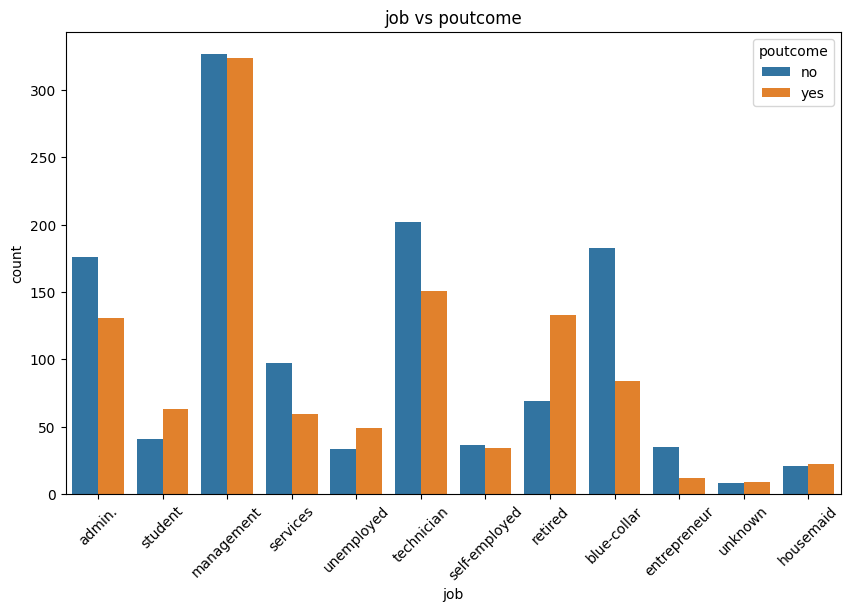

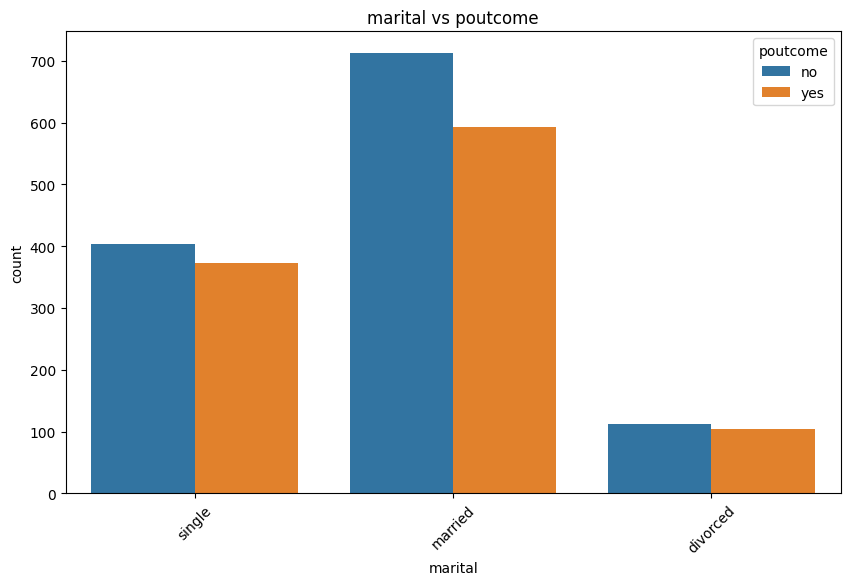

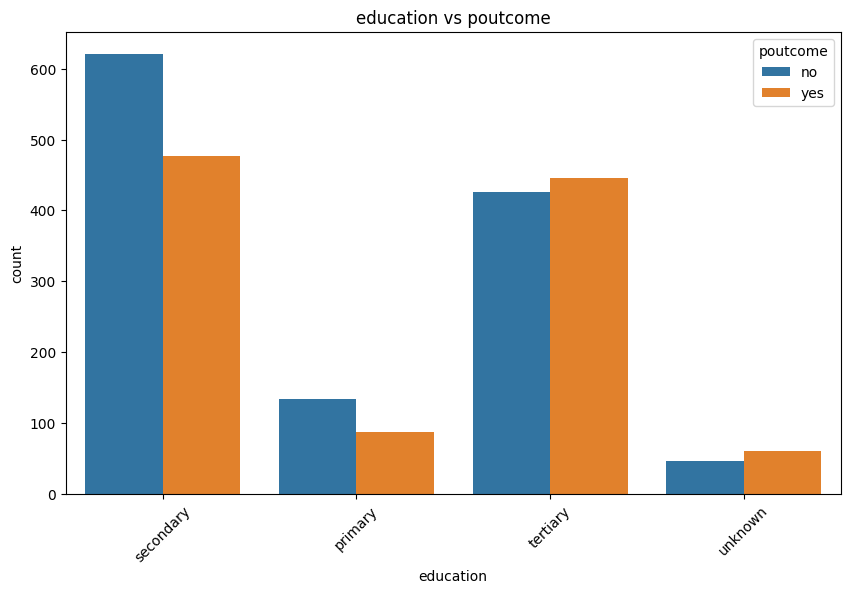

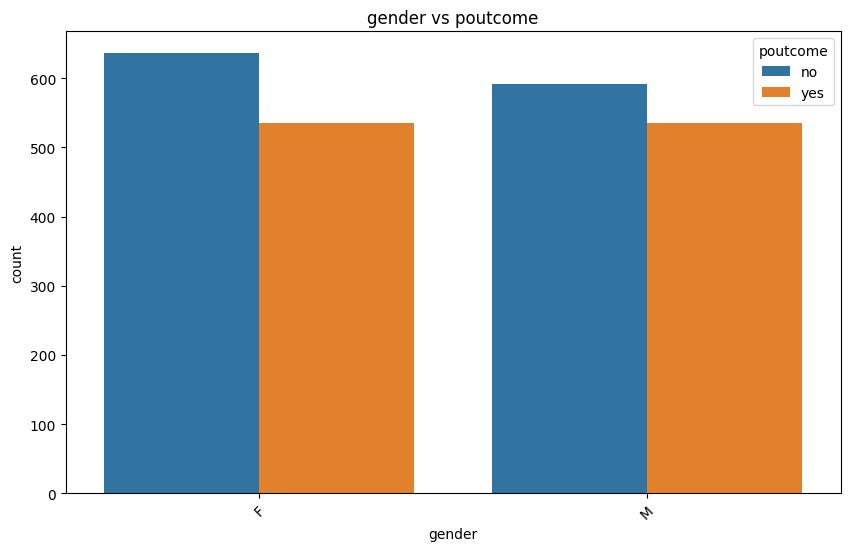

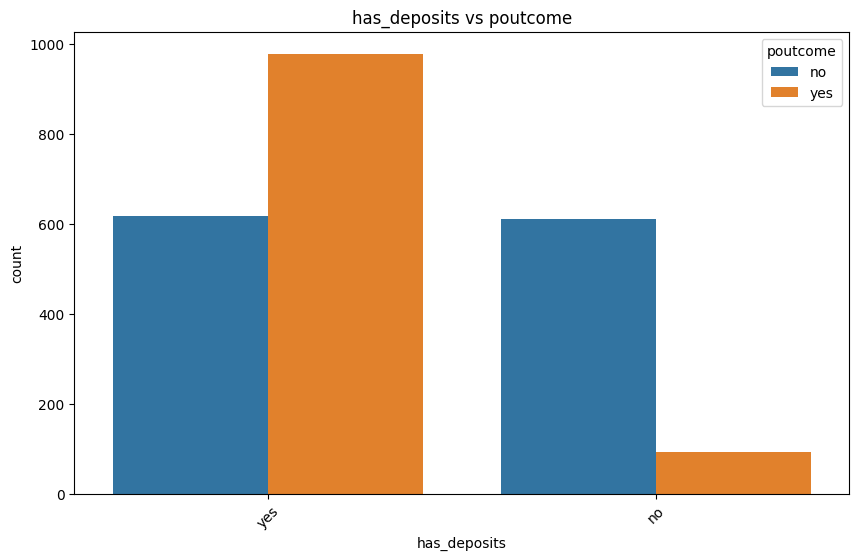

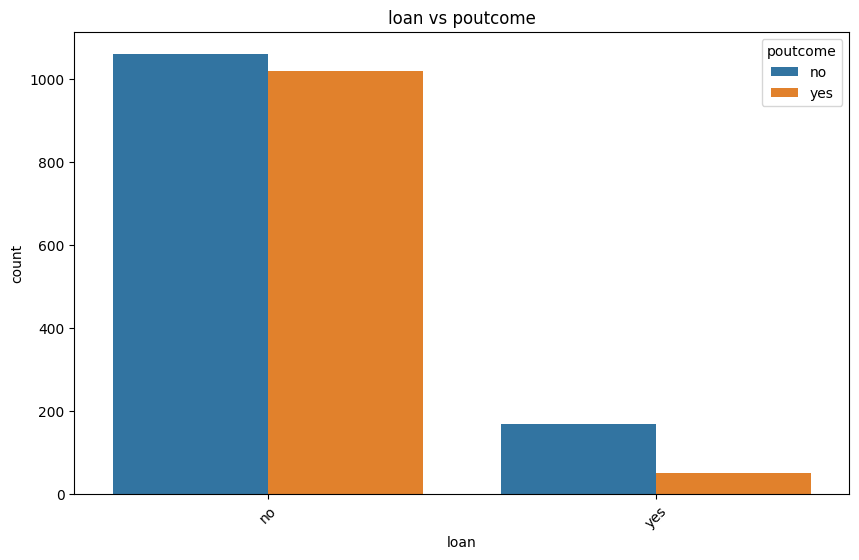

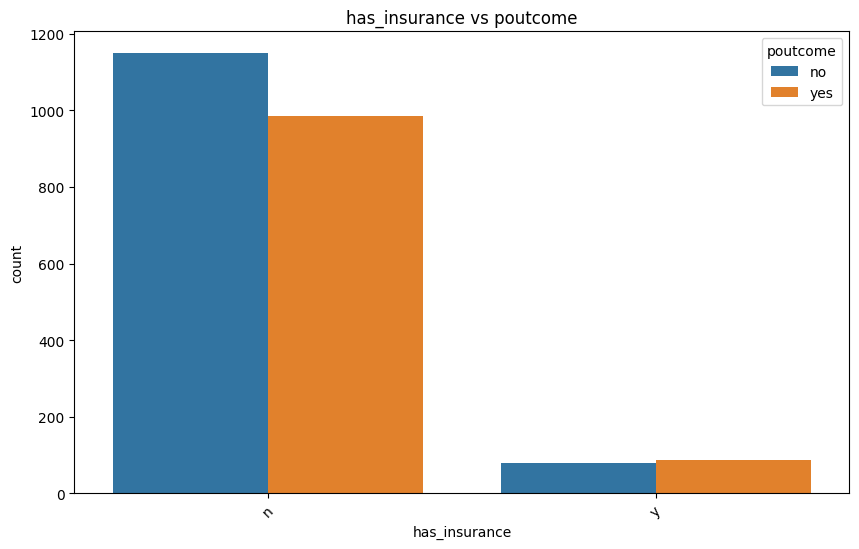

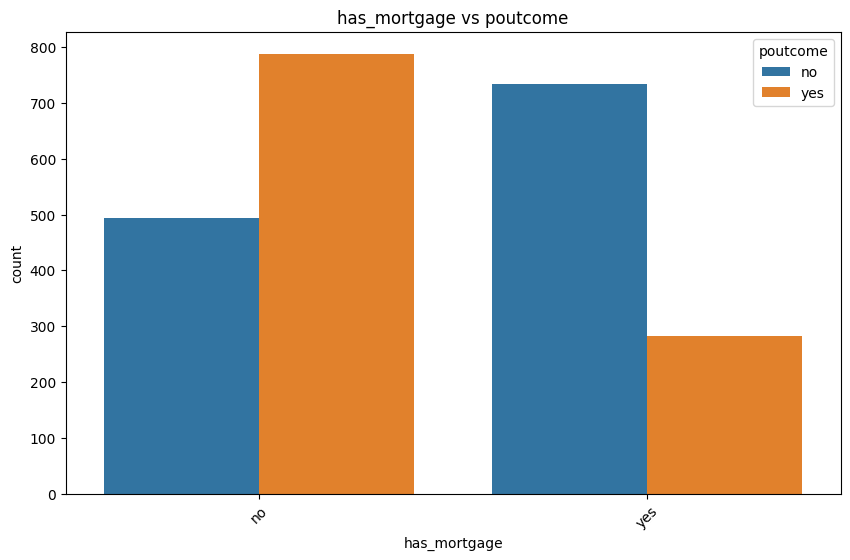

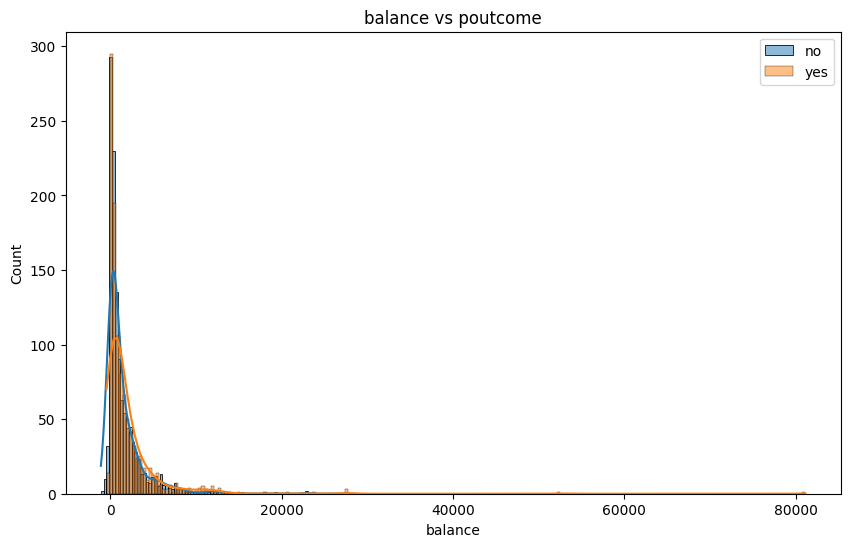

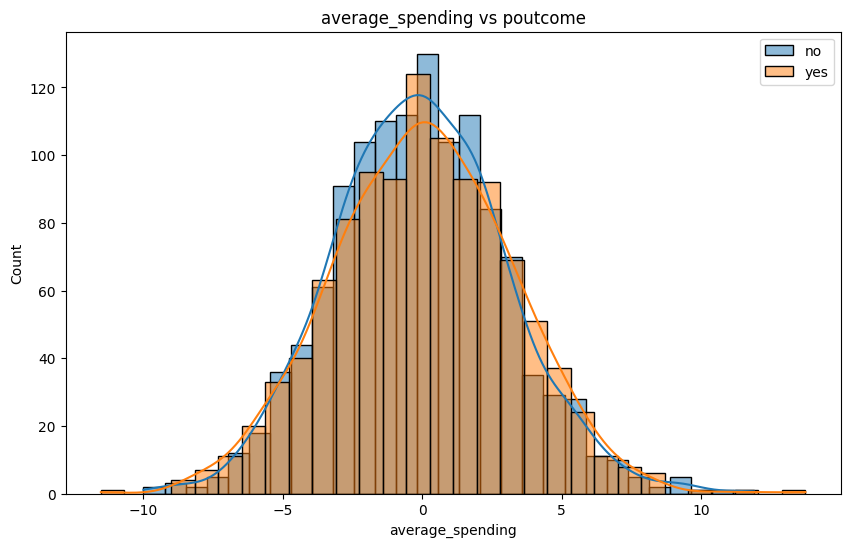

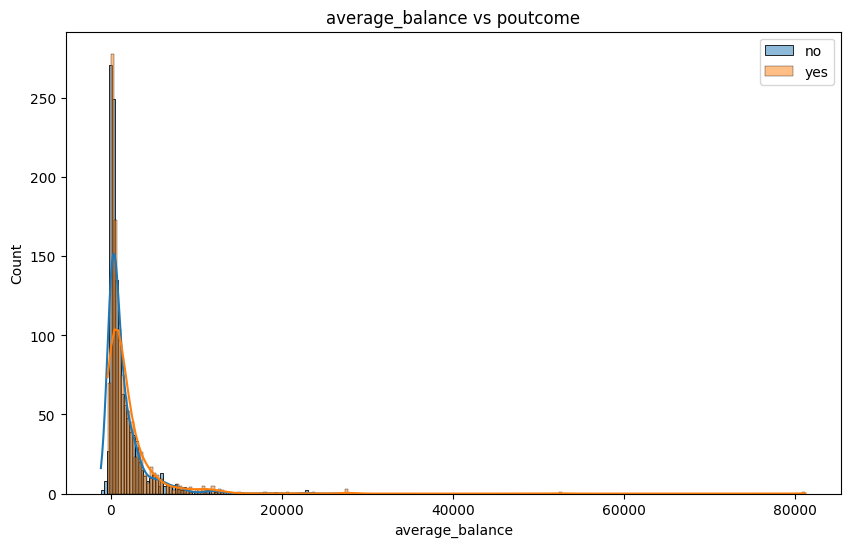

In [13]:
# visualize data distribution plot after resampling among the classes
features = df_outcome.columns.drop(['client_id', 'poutcome'])
for feature in features:
    if df_outcome[feature].dtype == 'object':  # Categorical feature
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, hue='poutcome', data=df_outcome)
        plt.title(f'{feature} vs poutcome')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.show()
    else:  # Numerical feature
        plt.figure(figsize=(10, 6))
        for outcome in df_outcome['poutcome'].unique():
            sns.histplot(df_outcome[df_outcome['poutcome'] == outcome][feature], kde=True, label=outcome)
        plt.title(f'{feature} vs poutcome')
        plt.legend()
        plt.show()